In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("marketing_AB.csv")

In [4]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.duplicated(subset = 'user id').sum()

0

In [6]:
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

In [8]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [12]:
df_cat = df[['test group', 'converted', 'most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [17]:
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


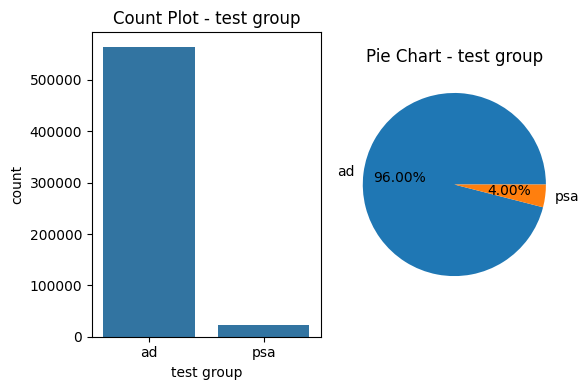

In [20]:
variable = 'test group'

plt.figure(figsize = (6,4))
#COUNTPLOT
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

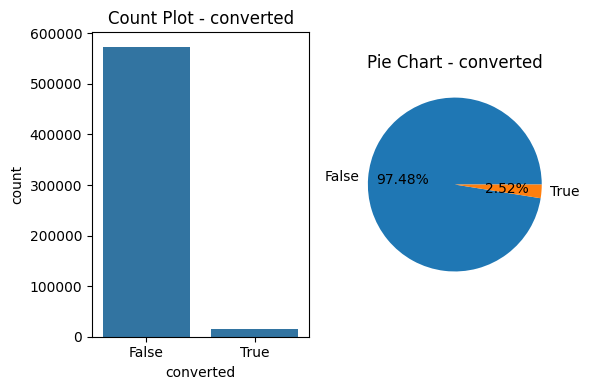

In [21]:
variable = 'converted'

plt.figure(figsize = (6,4))
#COUNTPLOT
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

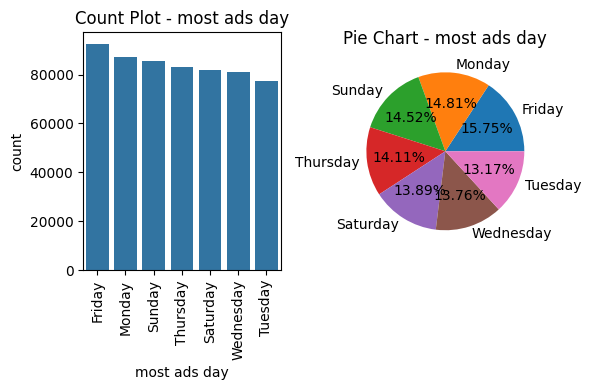

In [24]:
variable = 'most ads day'

plt.figure(figsize = (6,4))
#COUNTPLOT
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order= df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

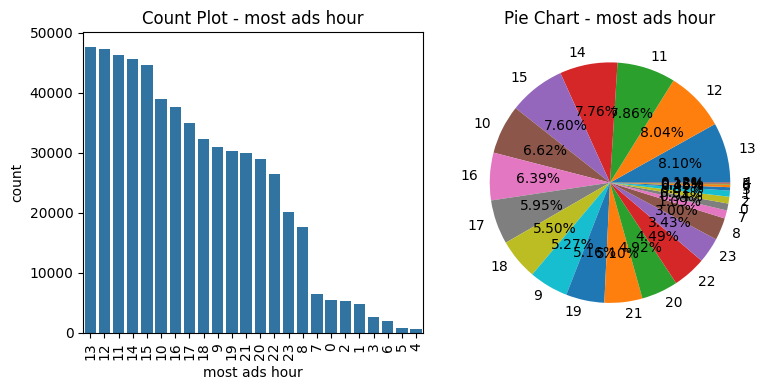

In [26]:
variable = 'most ads hour'

plt.figure(figsize = (8,4))
#COUNTPLOT
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order= df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust Layout
plt.tight_layout()

#Show the plots
plt.show()

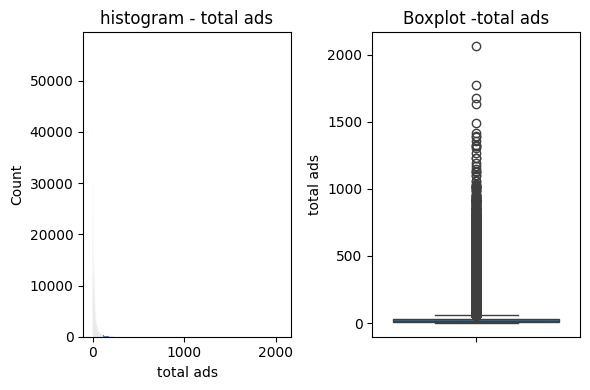

In [28]:
variable='total ads'

plt.figure(figsize = (6 , 4 ))
#HISTOGRAM  
plt.subplot(1, 2, 1)
sns.histplot(x= variable, data=df)
plt.title(f'histogram - {variable}')

#PIE CHART
plt.subplot(1, 2, 2)
sns.boxplot(y =  variable, data = df)
plt.title(f'Boxplot -{variable}')

#adjust Layout
plt.tight_layout()

#show the plots
plt.show()

In [29]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

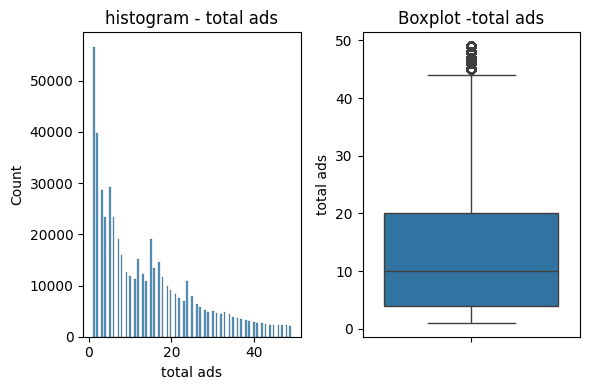

In [31]:
variable='total ads'

plt.figure(figsize = (6 , 4 ))
#HISTOGRAM  
plt.subplot(1, 2, 1)
sns.histplot(x= variable, data=df [df['total ads'] < 50])
plt.title(f'histogram - {variable}')

#PIE CHART
plt.subplot(1, 2, 2)
sns.boxplot(y =  variable, data = df [df['total ads'] < 50])
plt.title(f'Boxplot -{variable}')

#adjust Layout
plt.tight_layout()

#show the plots
plt.show()

Bivariate Analysis

In [32]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [34]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


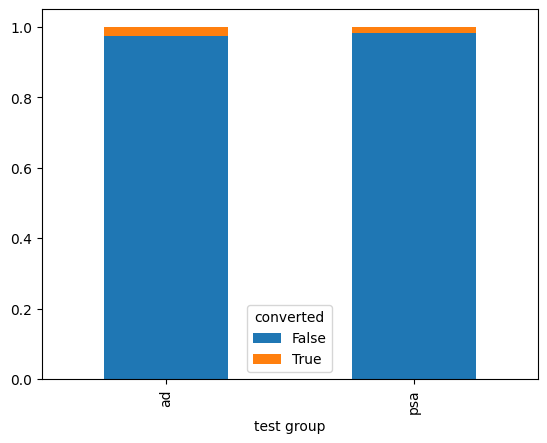

In [35]:
ct_conversion_test_group.plot.bar(stacked = True);